In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path = "D:/request/estagio/Dataset.xlsx"

bd_desempenho = pd.read_excel(path, sheet_name="bd_desempenho")
bd_estrutura_projeto = pd.read_excel(path, sheet_name="bd_estrutura_projetos")

In [7]:
bd_desempenho.head()

,student_id,original_cohort,cohort,project,status,grade,resit_days,evaluation_type
0,434,T7,T7,Projeto 28,approved,0.900000,0,standard
1,376,T7,T7,Projeto 28,approved,0.800000,0,standard
2,463,T7,T7,Projeto 28,approved,0.909091,24,recovery
3,460,T7,T7,Projeto 28,approved,0.800000,0,standard
4,361,T7,T7,Projeto 28,approved,1.000000,0,standard


In [8]:
bd_estrutura_projeto.head()

,project_number,theme
0,Projeto 1,Canvas - Mapa da Persona e Proposta de Valor
1,Projeto 2,Introdução ao Ambiente de Negócios
2,Projeto 3,"Método 3M, Teoria dos Seis e World Café"
3,Projeto 4,"Pensamento Sistêmico, Learning Organization e ..."
4,Projeto 5,"Planejamento Estratégico, Gestão de Indicadore..."


In [9]:
bd_desempenho = bd_desempenho.merge(bd_estrutura_projeto, left_on="project", 
                    right_on="project_number", how="left")

In [10]:
bd_desempenho.head()

,student_id,original_cohort,cohort,project,status,grade,resit_days,evaluation_type,project_number,theme
0,434,T7,T7,Projeto 28,approved,0.900000,0,standard,Projeto 28,Objetivos do Desenvolvimento Sustentável aplic...
1,376,T7,T7,Projeto 28,approved,0.800000,0,standard,Projeto 28,Objetivos do Desenvolvimento Sustentável aplic...
2,463,T7,T7,Projeto 28,approved,0.909091,24,recovery,Projeto 28,Objetivos do Desenvolvimento Sustentável aplic...
3,460,T7,T7,Projeto 28,approved,0.800000,0,standard,Projeto 28,Objetivos do Desenvolvimento Sustentável aplic...
4,361,T7,T7,Projeto 28,approved,1.000000,0,standard,Projeto 28,Objetivos do Desenvolvimento Sustentável aplic...


In [11]:
bd_desempenho = bd_desempenho.drop("project_number", axis=1)

In [12]:
bd_desempenho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15229 entries, 0 to 15228
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       15229 non-null  int64  
 1   original_cohort  15229 non-null  object 
 2   cohort           15229 non-null  object 
 3   project          15229 non-null  object 
 4   status           15229 non-null  object 
 5   grade            15229 non-null  float64
 6   resit_days       15229 non-null  int64  
 7   evaluation_type  15229 non-null  object 
 8   theme            15229 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB


Tipos de Alunos:

---

- **status**
  - approved: aprovado
  - resit: em readequação
  - still under evaluation: ainda pode ser avaliado
  - resit old cohort: entregaveis indeferidos por conta da trilha anterior
- **evaluation_type**
  - standard: avaliação sem readequação
  - recovery: avaliação entregue no período de recuperação

In [13]:
bd_desempenho["project"] = bd_desempenho["project"].apply(lambda x: int(x.split()[1]))

In [14]:
def tipo_aluno(status, evaluation_type):
  if status == "approved" and evaluation_type == "standard":
    return "aprovado sem readequação"
  elif status == "approved" and evaluation_type in "recovery":
    return "aprovado com readequação"
  elif status in ["resit", "resit - old cohort"]:
    return "em readequação sem aprovação"
  else:
    return "em avaliação"

bd_desempenho["student_type"] = bd_desempenho.apply(
    lambda x: tipo_aluno(x.status, x.evaluation_type), axis=1
)

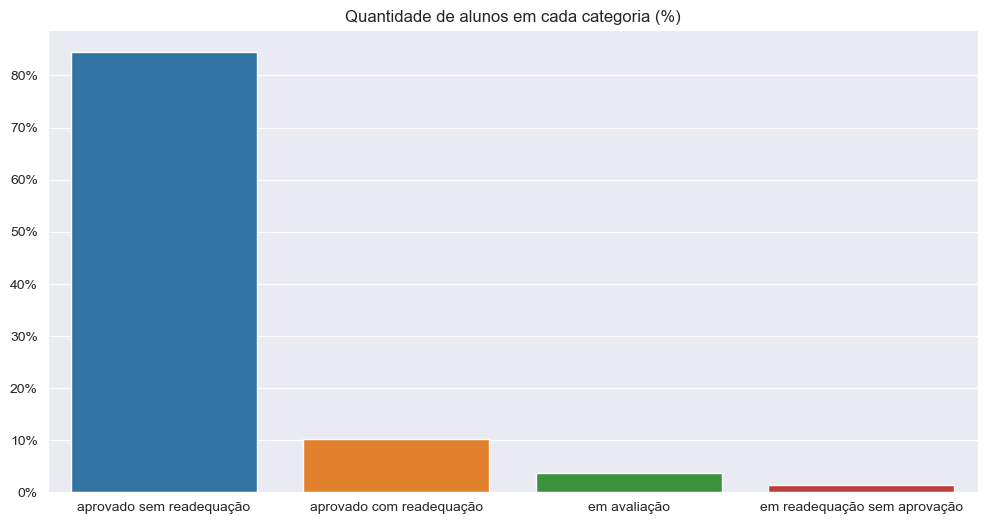

In [15]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

porcentagem_por_categoria = bd_desempenho.value_counts(subset="student_type", normalize=True) * 100
ax = sns.barplot(x=porcentagem_por_categoria.index, y=porcentagem_por_categoria.values)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("")
plt.title("Quantidade de alunos em cada categoria (%)")
plt.show()

Podemos ver uma quantidade expressiva de alunos que foram aprovados sem readequação (cerca de 84%)

In [16]:
bd_desempenho.head()

,student_id,original_cohort,cohort,project,status,grade,resit_days,evaluation_type,theme,student_type
0,434,T7,T7,28,approved,0.900000,0,standard,Objetivos do Desenvolvimento Sustentável aplic...,aprovado sem readequação
1,376,T7,T7,28,approved,0.800000,0,standard,Objetivos do Desenvolvimento Sustentável aplic...,aprovado sem readequação
2,463,T7,T7,28,approved,0.909091,24,recovery,Objetivos do Desenvolvimento Sustentável aplic...,aprovado com readequação
3,460,T7,T7,28,approved,0.800000,0,standard,Objetivos do Desenvolvimento Sustentável aplic...,aprovado sem readequação
4,361,T7,T7,28,approved,1.000000,0,standard,Objetivos do Desenvolvimento Sustentável aplic...,aprovado sem readequação


Para começar a análise exploratória é interessante primeiro explorar a fundo o que cada coluna tem a nos dizer em realação a nossa coluna criada student_type, sendo assim, essa análise será feita minunciosamente em cada coluna

### **original_cohort**

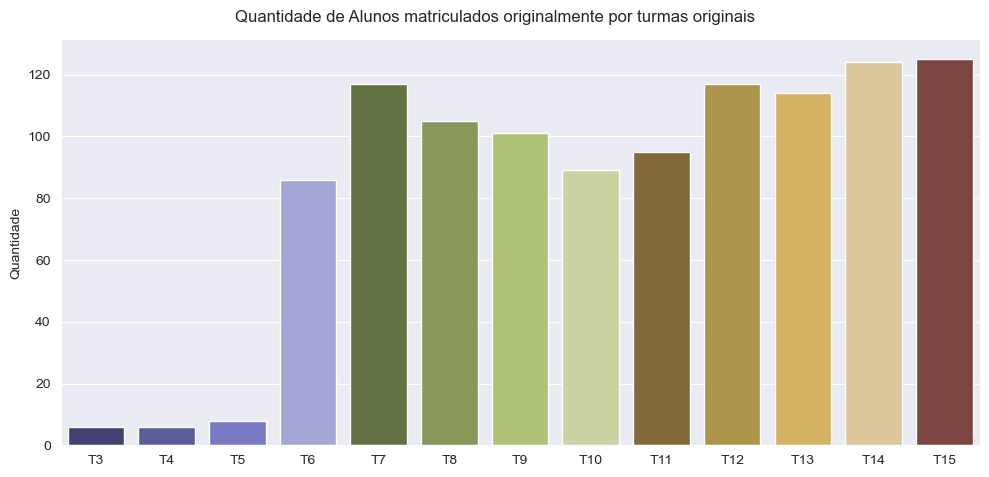

In [17]:
qtde_alunos_por_turma = bd_desempenho.groupby("original_cohort", as_index=False) \
                          .agg(qtde_alunos=("student_id", "nunique"))

ax = sns.catplot(kind="bar", data=qtde_alunos_por_turma, order=[f"T{i}" for i in range(3, 16)],
                 height=5, aspect=2, x="original_cohort", y="qtde_alunos", palette="tab20b")

ax.fig.subplots_adjust(top=0.92)
ax.fig.suptitle('Quantidade de Alunos matriculados originalmente por turmas originais')
plt.xlabel("")
plt.ylabel("Quantidade")
plt.show()

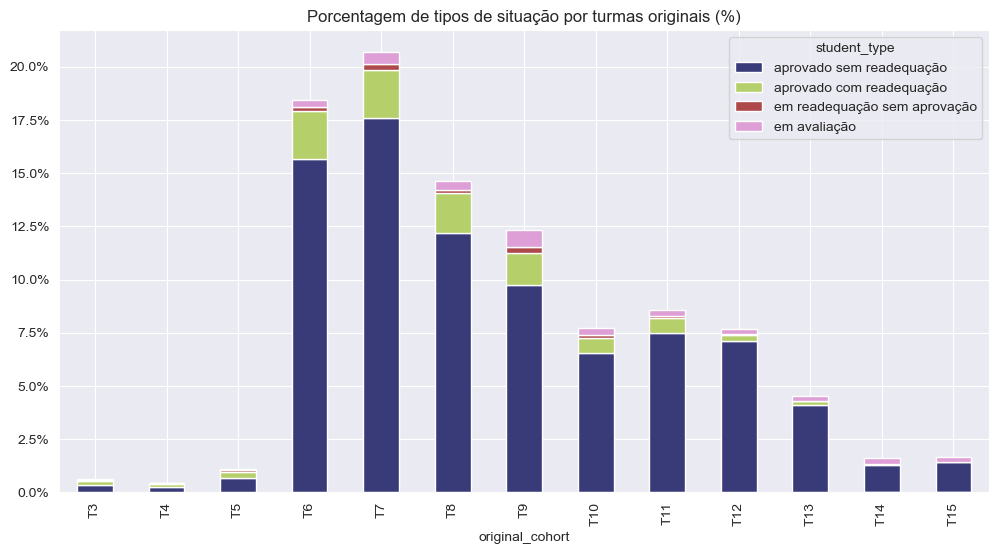

In [18]:
x, y = 'original_cohort', "student_type"

oc_por_student_type = bd_desempenho \
                        .value_counts(subset=[x, y], normalize=True) \
                        .mul(100) \
                        .rename('percent') \
                        .reset_index()

oc_por_student_type = oc_por_student_type.pivot_table(index="original_cohort", 
                                                      columns="student_type", 
                                                      values="percent")

oc_por_student_type = oc_por_student_type[["aprovado sem readequação", "aprovado com readequação", 
                                           "em readequação sem aprovação", "em avaliação"]]

oc_por_student_type.sort_index(key=lambda x: (x.to_series().str[1:].astype(int)), inplace=True)
ax = oc_por_student_type.plot(kind="bar", stacked="true", 
                         colormap="tab20b", figsize=(12, 6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Porcentagem de tipos de situação por turmas originais (%)")
plt.show()

Olhar com carinho nas turmas de 6 até 11

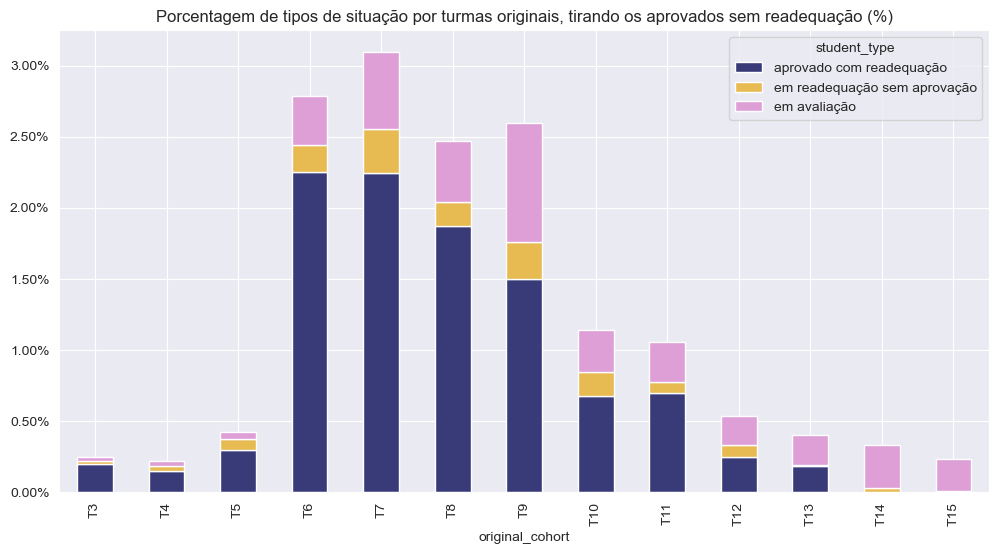

In [19]:
x, y = 'original_cohort', "student_type"

oc_por_student_type = bd_desempenho \
                        .value_counts(subset=[x, y], normalize=True) \
                        .mul(100) \
                        .rename('percent') \
                        .reset_index()

oc_por_student_type = oc_por_student_type.pivot_table(index="original_cohort", 
                                                      columns="student_type", 
                                                      values="percent")

oc_por_student_type.drop("aprovado sem readequação", axis=1)
oc_por_student_type = oc_por_student_type[["aprovado com readequação", 
                                           "em readequação sem aprovação", "em avaliação"]]

oc_por_student_type.sort_index(key=lambda x: (x.to_series().str[1:].astype(int)), inplace=True)
ax = oc_por_student_type.plot(kind="bar", stacked="true", 
                         colormap="tab20b", figsize=(12, 6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Porcentagem de tipos de situação por turmas originais, tirando os aprovados sem readequação (%)")
plt.show()


### **cohort**

Será que mudança de salas influencia se a pessoa consegue entregar os projetos sem readequação?

In [20]:
bd_desempenho["changed_class"] = bd_desempenho.apply(lambda x: "não mudou de classe" if x.original_cohort == x.cohort else "mudou de classe", axis=1)

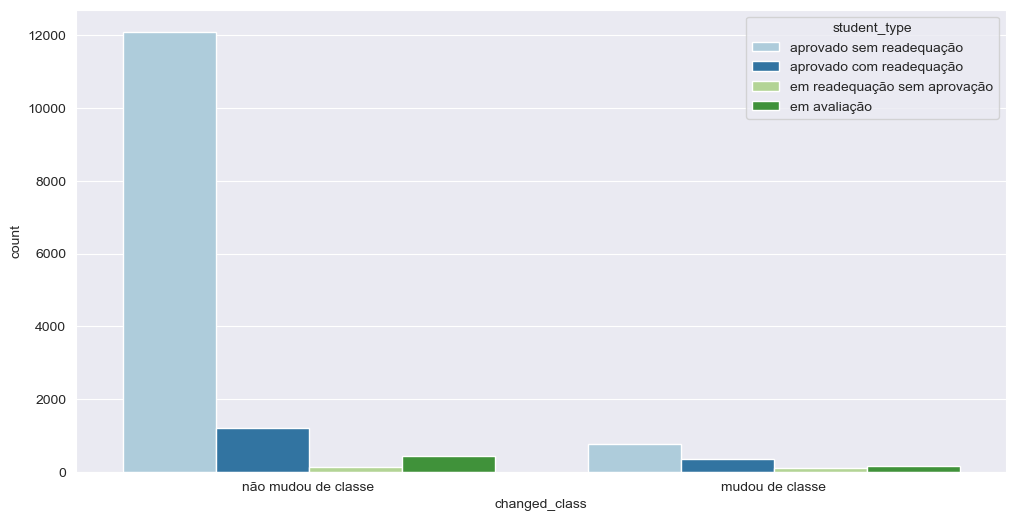

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=bd_desempenho, hue="student_type", x="changed_class", palette="Paired")
plt.show()

In [22]:
#É interessante saber também a porcentagem de aprovados por cada tipo
bd_desempenho.value_counts(subset=["student_type", "changed_class"], normalize=True) * 100

student_type                  changed_class      
aprovado sem readequação      não mudou de classe    79.460240
aprovado com readequação      não mudou de classe     7.938801
aprovado sem readequação      mudou de classe         4.997045
em avaliação                  não mudou de classe     2.823560
aprovado com readequação      mudou de classe         2.377044
em avaliação                  mudou de classe         0.952131
em readequação sem aprovação  não mudou de classe     0.820802
                              mudou de classe         0.630376
dtype: float64

In [23]:
mudou_de_classe = bd_desempenho[bd_desempenho["changed_class"] == "mudou de classe"]
nao_mudou_de_classe = bd_desempenho[bd_desempenho["changed_class"] == "não mudou de classe"]

qtde_de_aprovados_mudou_de_classe     = mudou_de_classe[mudou_de_classe["student_type"] == "aprovado sem readequação"].shape[0]
qtde_de_aprovados_nao_mudou_de_classe = nao_mudou_de_classe[nao_mudou_de_classe["student_type"] == "aprovado sem readequação"].shape[0]

print(f"Porcentagem de alunos que mudaram de classe e foram aprovados: {round(qtde_de_aprovados_mudou_de_classe / mudou_de_classe.shape[0] * 100, 2)}%")
print(f"Porcentagem de alunos que não mudaram de classe e foram aprovados: {round(qtde_de_aprovados_nao_mudou_de_classe / nao_mudou_de_classe.shape[0] * 100, 2)}%")

Porcentagem de alunos que mudaram de classe e foram aprovados: 55.79%
Porcentagem de alunos que não mudaram de classe e foram aprovados: 87.28%


Uma porcentagem muito menor para quem muda de sala, essa já é uma informação bem relevante. Com isso, outra informação interessante é ver a quantidade de projetos em que as startups trocaram de sala, dessa forma é possivel saber se essa informação bate entre as turmas 6 até 10.

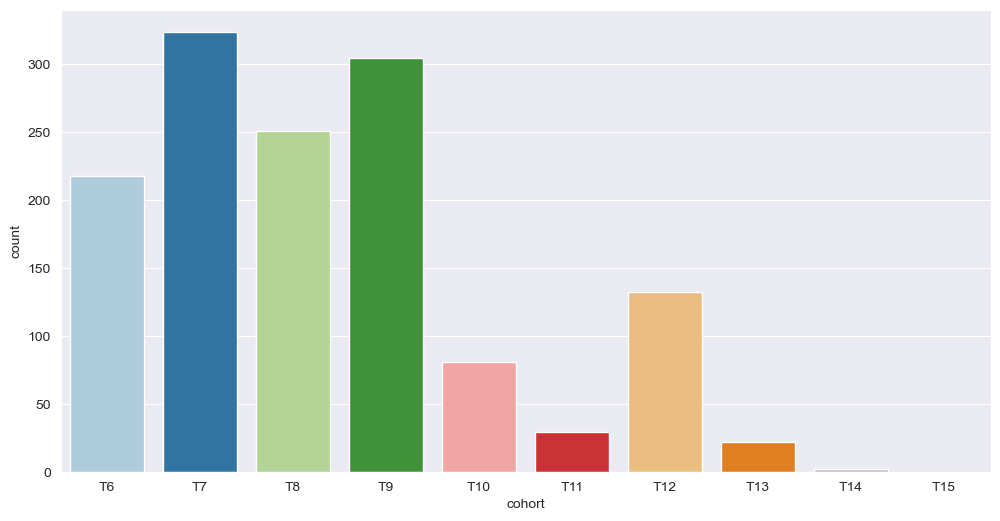

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=mudou_de_classe, x="cohort", 
              palette="Paired", order=[f"T{i}" for i in range(6, 16)])
plt.show()